In [661]:
import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as plot
import matplotlib.pyplot as plt
import math
import numpy as np
import copy
import pandapower.shortcircuit as sc
#from matplotlib.transforms import BlendedGenericTransform
#from pandapower.plotting import simple_plot, simple_plotly, pf_res_plotly

# Predefined network of IEEE 4gs bus system 
net_temp = pp.networks.case4gs()
#plot.simple_plot(net)

In [662]:
#COPY PARAMETERS FROM TEMP NETWORK TO USE IN 2 BUS RADIAL SYSTEM.
#BUSES
b0_in_service = net_temp.bus.in_service[0]
b0_max_vm_pu = net_temp.bus.max_vm_pu[0]
b0_min_vm_pu = net_temp.bus.min_vm_pu[0]
b0_name = net_temp.bus.name[0]
b0_type = net_temp.bus.type[0]
b0_vn_kv = net_temp.bus.vn_kv[0]
b0_zone = net_temp.bus.zone[0]
b0_geodata = (3,2)

b1_in_service = net_temp.bus.in_service[1]
b1_max_vm_pu = net_temp.bus.max_vm_pu[1]
b1_min_vm_pu = net_temp.bus.min_vm_pu[1]
b1_name = net_temp.bus.name[1]
b1_type = net_temp.bus.type[1]
b1_vn_kv = net_temp.bus.vn_kv[1]
b1_zone = net_temp.bus.zone[1]
b1_geodata = (4,2)

#BUS ELEMENTS
load_bus = net_temp.load.bus[1]
load_in_service = net_temp.load.in_service[1]
load_p_mw = net_temp.load.p_mw[1]
load_q_mvar = net_temp.load.q_mvar[1]
load_scaling = net_temp.load.scaling[1]

extGrid_bus = net_temp.ext_grid.bus[0]
extGrid_in_service = net_temp.ext_grid.in_service[0]
extGrid_va_degree = net_temp.ext_grid.va_degree[0]
extGrid_vm_pu = net_temp.ext_grid.vm_pu[0]
extGrid_max_p_mw = net_temp.ext_grid.max_p_mw[0]
extGrid_min_p_mw = net_temp.ext_grid.min_p_mw[0]
extGrid_max_q_mvar = net_temp.ext_grid.max_q_mvar[0]
extGrid_min_q_mvar = net_temp.ext_grid.min_q_mvar[0]

#LINES
line0_scaling = 1
line0_c_nf_per_km = net_temp.line.c_nf_per_km[0]
line0_df = net_temp.line.df[0]
line0_from_bus = net_temp.line.from_bus[0]
line0_g_us_per_km = net_temp.line.g_us_per_km[0]
line0_in_service = net_temp.line.in_service[0]
line0_length_km = net_temp.line.length_km[0]
line0_max_i_ka = net_temp.line.max_i_ka[0]
line0_max_loading_percent = net_temp.line.max_loading_percent[0]
line0_parallel = net_temp.line.parallel[0]
line0_r_ohm_per_km = net_temp.line.r_ohm_per_km[0] * line0_scaling
line0_to_bus = net_temp.line.to_bus[0]
line0_type = net_temp.line.type[0]
line0_x_ohm_per_km = net_temp.line.x_ohm_per_km[0] * line0_scaling


line1_scaling = 1.2
line1_c_nf_per_km = line0_c_nf_per_km
line1_df = line0_df
line1_from_bus = line0_from_bus 
line1_g_us_per_km = line0_g_us_per_km
line1_in_service = line0_in_service
line1_length_km = line0_length_km
line1_max_i_ka = line0_max_i_ka
line1_max_loading_percent = line0_max_loading_percent
line1_parallel = line0_parallel 
line1_r_ohm_per_km = line0_r_ohm_per_km
line1_to_bus = line0_to_bus
line1_type = line0_type
line1_x_ohm_per_km = line0_x_ohm_per_km * line1_scaling

In [663]:
#CREATE 2 BUS SYSTEM
net_2b = pp.create_empty_network()

#Create buses
b0 = pp.create_bus(net_2b, in_service=b0_in_service, max_vm_pu=b0_max_vm_pu, min_vm_pu=b0_min_vm_pu, 
                   name=b0_name, type=b0_type, vn_kv=b0_vn_kv, zone= b0_zone, geodata=b0_geodata)

b1 = pp.create_bus(net_2b, in_service=b1_in_service, max_vm_pu=b1_max_vm_pu, min_vm_pu=b1_min_vm_pu, 
                   name=b1_name, type=b1_type, vn_kv=b1_vn_kv, zone= b1_zone, geodata=b1_geodata)



#Create bus elements
load = pp.create_load(net_2b, bus=load_bus, in_service=load_in_service, 
                      p_mw=load_p_mw, q_mvar=load_q_mvar, scaling=load_scaling)

extGrid = pp.create_ext_grid(net_2b, bus=extGrid_bus, in_service=extGrid_in_service, va_degree=extGrid_va_degree,
                             vm_pu=extGrid_vm_pu, max_p_mw=extGrid_max_p_mw, min_p_mw=extGrid_min_p_mw,
                             max_q_mvar=extGrid_max_q_mvar, min_q_mvar=extGrid_min_q_mvar)

# Create lines
l0 = pp.create_line_from_parameters(net_2b, c_nf_per_km=line0_c_nf_per_km, df=line0_df, from_bus=line0_from_bus,
                   g_us_per_km=line0_g_us_per_km, in_service=line0_in_service, length_km=line0_length_km,
                   max_i_ka=line0_max_i_ka, max_loading_percent=line0_max_loading_percent,
                   parallel=line0_parallel, r_ohm_per_km=line0_r_ohm_per_km, to_bus=line0_to_bus, 
                   type=line0_type, x_ohm_per_km=line0_x_ohm_per_km)

l1 = pp.create_line_from_parameters(net_2b, c_nf_per_km=line1_c_nf_per_km, df=line1_df, from_bus=line1_from_bus,
                   g_us_per_km=line1_g_us_per_km, in_service=line1_in_service, length_km=line1_length_km,
                   max_i_ka=line1_max_i_ka, max_loading_percent=line1_max_loading_percent,
                   parallel=line1_parallel, r_ohm_per_km=line1_r_ohm_per_km, to_bus=line1_to_bus, 
                   type=line1_type, x_ohm_per_km=line1_x_ohm_per_km)

In [664]:
####Shunt FACTS device (bus 1)
#MV bus
bus_SVC = pp.create_bus(net_2b, name='MV SVCtrafo bus', vn_kv=69, type='n', geodata=(4.04,1.98), zone=2, max_vm_pu=1.1,
                        min_vm_pu=0.9)
#Trafo
trafoSVC = pp.create_transformer_from_parameters(net_2b, hv_bus=1, lv_bus=2, in_service=True, 
                                                name='trafoSVC', sn_mva=110, vn_hv_kv=230 , vn_lv_kv=69, 
                                                vk_percent=12, vkr_percent=0.26, pfe_kw=55, i0_percent=0.06,
                                                shift_degree=0, tap_side='hv', tap_neutral=0, tap_min=-9, tap_max=9,
                                                tap_step_percent=1.5, tap_step_degree=0, tap_phase_shifter=False) 
#Breaker between grid HV bus and trafo HV bus to connect buses
sw_SVC = pp.create_switch(net_2b, bus=1, element=0, et='t', type='CB', closed=False)
#Shunt devices connected with MV bus
shuntDev = pp.create_shunt(net_2b, bus_SVC, 2, in_service=True, name='Shunt Device', step = 1)

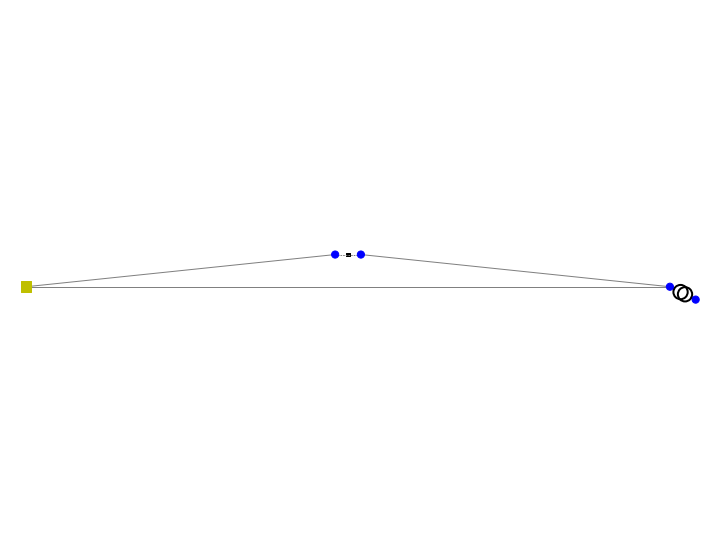

In [665]:
####Series device (at line 1, in middle between bus 0 and 1)
#Add intermediate buses for bypass and series compensation impedance
bus_SC1 = pp.create_bus(net_2b, name='SC bus 1', vn_kv=230, type='n', geodata=(3.48,2.05), 
                        zone=2, max_vm_pu=1.1, min_vm_pu=0.9)
bus_SC2 = pp.create_bus(net_2b, name='SC bus 2', vn_kv=230, type='n', geodata=(3.52,2.05), 
                        zone=2, max_vm_pu=1.1, min_vm_pu=0.9)
sw_SC_bypass = pp.create_switch(net_2b, bus=3, element=4, et='b', type='CB', closed=True)
imp_SC = pp.create_impedance(net_2b, from_bus=3, to_bus=4, rft_pu=0.0000001272, xft_pu=-0.0636,
                             rtf_pu=0.0000001272, xtf_pu=-0.0636, sn_mva=250, in_service=True) #Just some default values
#Adjust orginal Line 3 to connect to new buses instead.
net_2b.line.at[1, ['length_km', 'to_bus', 'name']] = [0.5, 3, 'line1_SC']                        
lineSC2 = pp.create_line_from_parameters(net_2b, name='line2_SC', c_nf_per_km=net_2b.line.at[1,'c_nf_per_km'],
                       df=net_2b.line.at[1, 'df'], from_bus=4, g_us_per_km=net_2b.line.at[1, 'g_us_per_km'],
                       in_service=net_2b.line.at[1, 'in_service'], length_km=0.5, max_i_ka=net_2b.line.at[1, 'max_i_ka'],
                       max_loading_percent=net_2b.line.at[1, 'max_loading_percent'], parallel=net_2b.line.at[1, 'parallel'],
                       r_ohm_per_km=net_2b.line.at[1, 'r_ohm_per_km'], std_type=net_2b.line.at[1, 'std_type'], to_bus=1, 
                       type=net_2b.line.at[1, 'type'], x_ohm_per_km=net_2b.line.at[1, 'x_ohm_per_km'])
plot.simple_plot(net_2b)

In [666]:
##Function to calculate line reactance in pu
def X_pu(net, line_index):  
    s_base = 100e6
    v_base = 230e3
    x_base = pow(v_base,2) / s_base
    x_line_ohm = net_2b.line.x_ohm_per_km[line_index]
    x_line_pu = x_line_ohm / x_base # Can take one since this line is divivded into 
                                                  # 2 identical lines with length 0.5 km
    return x_line_pu

In [667]:
##Function to calculate active power reference for the series compensation
def P_ref(net, line_index):
    line_from_bus = net.line.from_bus[line_index]
    line_to_bus = net.line.to_bus[line_index]
    v0_pu = net.res_bus.vm_pu[line_from_bus]
    v1_pu = net.res_bus.vm_pu[line_to_bus]
    x_line_pu = X_pu(net, line_index)
    delta_deg = net.res_bus.va_degree[line_from_bus] - net.res_bus.va_degree[line_to_bus]
    p_ref_pu = (v0_pu*v1_pu*math.sin(math.radians(delta_deg))) / x_line_pu
    return p_ref_pu  

In [668]:
##Function to return a reference network with FACTS devices disabled with results aquired after pp.runpp()
def Net_copy_noFACTS(net):
    network = copy.deepcopy(net) #To not changing anything in actual network
    network.switch.closed[0] = False 
    network.switch.closed[1] = True
    pp.runpp(network)
    return network

In [669]:
##Function for transition from reference power to reactance of "TCSC"
def K_x_comp_pu(net, p_ref_pu, line_index, k_old): 
    #line_from_bus = net.line.from_bus[line_index]
    #line_to_bus = net.line.to_bus[line_index]
    
    #x_line_pu = X_pu(net, line_index)

    #k_x_comp_max_ind = 0.4 #maximum inductive reactance compensation of the line
    #k_x_comp_max_cap = -0.4 #maximum capacitive reactance compensation of the line
    #v_s_pu = net.res_bus.vm_pu[line_from_bus]
    #v_r_pu = net.res_bus.vm_pu[line_to_bus]
    #delta_deg = net.res_bus.va_degree[line_from_bus] - net.res_bus.va_degree[line_to_bus]
    #k_delta = ((v_s_pu * v_r_pu * math.sin(math.radians(delta_deg))) / (p_ref_pu* x_line_pu)) - 1 - k_old
    #k_x_comp = k_delta + k_old
    #print(k_x_comp)
    
    ##NEW VERSION TEST:
    c = 15 #Coefficient for transnition tuned to hit equal load sharing at nominal IEEE
    k_x_comp_max_ind = 0.4
    k_x_comp_max_cap = -k_x_comp_max_ind
    loading_perc_ref = p_ref_pu
    loading_perc_meas = net.res_line.loading_percent[line_index]
    k_x_comp = c * k_x_comp_max_ind * (loading_perc_meas - loading_perc_ref) / 100 #To get percentage in pu
    
    
    if k_x_comp > k_x_comp_max_ind:
        k_x_comp = k_x_comp_max_ind
    if k_x_comp < k_x_comp_max_cap:
        k_x_comp = k_x_comp_max_cap
    return k_x_comp

In [670]:
##Function for transition from reference parameter to reactive power output of shunt device
def Shunt_q_comp(net, v_ref_pu, bus_index, q_old):   
    v_bus_pu = net.res_bus.vm_pu[bus_index]
    k = 25 #Coefficient for transition, tuned to hit 1 pu with nominal IEEE
    q_rated = 100 #Mvar
    q_min = -q_rated
    q_max = q_rated
    q_delta = k*q_rated*(v_bus_pu-v_ref_pu)-q_old #q_old might come in handy later with RL if able to take actions without 
                                                  #independent change in environment
    q_comp = q_delta + q_old
    
    if q_comp > q_max:
        q_comp = q_max
    if q_comp < q_min:
        q_comp = q_min
    
    #print(q_comp)
    return q_comp

In [671]:
##Function for nose curve
def NoseCurve(bus_index, net, shunt, sc, line_load_limit):
    network = Net_copy_noFACTS(net) #To not changing anything in actual network
    fig = plt.figure()
    
    load_increment = 0.05
    load_start = 0.1
    load_prev = 0.1 - load_increment
    l_arr = np.array([])
    v_res = np.array([])
    l_ind = 0
    l_p_mw = network.load.p_mw[l_ind]
    l_q_mvar = network.load.q_mvar[l_ind]
    x_line_pu = X_pu(network, l_ind)
    k_old = 0 #initialise as 0
    networkFailure = False
        
    while not networkFailure: 
        #Scaling
        l_scaling = load_prev + load_increment
        load_prev = l_scaling
        network.load.p_mw[l_ind] = l_p_mw*l_scaling
        network.load.q_mvar[l_ind] = l_q_mvar*l_scaling
        
        try:            
            pp.runpp(network)
            # Shunt compensation
            v_ref_pu = 1
            q_comp = Shunt_q_comp(network, v_ref_pu, bus_index, q_old)
            network.shunt.q_mvar =  q_comp
            #print(network.shunt.q_mvar)

            # Series compensation
            p_ref_pu = 45.121487#0.8290964385354463 #Should be changed every X time steps to emulate 
                                          #change by system operator when implemented in RL.
            k_x_comp_pu = K_x_comp_pu(network, p_ref_pu, l_ind, k_old)
            network.impedance.loc[0, ['xft_pu','xtf_pu']] = x_line_pu * k_x_comp_pu
            k_old = k_x_comp_pu #update for next iter
            #print(k_x_comp_pu)

            # Enable FACTS devices if they should be
            network.switch.closed[0] = shunt 
            network.switch.closed[1] != sc
        
            pp.runpp(network)
            v_res = np.append(v_res, network.res_bus.vm_pu[bus_index])
            l_arr = np.append(l_arr, l_scaling)
            if len([x for x in network.res_line.loading_percent if x >line_load_limit])>0:
                networkFailure=True;
        except:
            networkFailure=True  
        
        # Reset FACTS devices to get proper transition next time step.
        network.switch.closed[0] = False 
        network.switch.closed[1] = True

    plt.plot(l_arr, v_res, figure=fig)
    plt.ylabel('Bus Voltage [pu]')
    plt.xlabel('Active power [pu]')
    plt.grid(True)
    
    return [fig, v_res, l_arr]

In [672]:
##Function to merge figures into 1
def MergeFig(v_res1, l_arr1, label1, v_res2, l_arr2, label2, v_res3, l_arr3, label3):
    fig = plt.figure()
    plt.plot(l_arr1, v_res1, figure=fig, label=label1)
    plt.plot(l_arr2, v_res2, figure=fig, label=label2)
    plt.plot(l_arr3, v_res3, figure=fig, label=label3)
    plt.ylabel('Bus Voltage [pu]')
    plt.xlabel('Active power load at bus [scaling relative to nominal IEEE]')
    plt.grid(True)
    plt.legend()
    return fig    

In [673]:
#SETTINGS
p_ref = 45.121487# P_ref(Net_copy_noFACTS(net_2b), 0)
print(p_ref)

45.121487


In [674]:
pp.runpp(net_2b)
print(net_2b.res_line.loading_percent)
net_2b.res_ext_grid

0    45.121487
1    37.137409
2    38.030244
Name: loading_percent, dtype: float64


,p_mw,q_mvar
0,172.105825,100.29601


In [675]:
net_2b.switch.closed[0] = True
x_line_pu = X_pu(net_2b, 1)
q_old = 0
bus_index = 1
v_ref_pu = 1
q_comp = Shunt_q_comp(net_2b, v_ref_pu, bus_index, q_old)
net_2b.shunt.q_mvar = q_comp
pp.runpp(net_2b)

In [676]:
net_2b.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-171.817296,6.964789
1,0.991964,-2.724589,170.000000,105.350000
2,1.105758,-2.868856,0.000000,-115.395408
3,0.996344,-1.362968,0.000000,0.000000
4,0.996344,-1.362968,0.000000,0.000000


In [677]:
net_2b.res_line.loading_percent

0    37.430556
1    31.357518
2    31.367138
Name: loading_percent, dtype: float64

In [678]:
net_2b.res_shunt

,p_mw,q_mvar,vm_pu
0,0.0,-115.395408,1.105758


In [679]:
k_x_comp_pu = K_x_comp_pu(net_2b, p_ref, 1, 0)
k_x_comp_pu

-0.4

In [680]:
l_ind = 0
l_scaling = 2
l_p_mw = net_2b.load.p_mw[l_ind]
l_q_mvar = net_2b.load.q_mvar[l_ind]
net_2b.load.p_mw[l_ind] = l_p_mw*l_scaling
net_2b.load.q_mvar[l_ind] = l_q_mvar*l_scaling
pp.runpp(net_2b)

In [681]:
net_2b.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-347.537732,-139.706792
1,0.945704,-5.339989,340.000000,210.700000
2,1.054192,-5.484255,0.000000,-104.883592
3,0.972425,-2.601603,0.000000,0.000000
4,0.972425,-2.601603,0.000000,0.000000


In [682]:
net_2b.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,190.194751,73.563583,-185.937741,-60.369015,4.257010,13.194568,0.511898,0.518903,0.518903,1.000000,0.000000,0.945704,-5.339989,82.686471
1,157.342981,66.143209,-155.860275,-61.401657,1.482707,4.741553,0.428445,0.432434,0.432434,1.000000,0.000000,0.972425,-2.601603,68.907717
2,155.860275,61.401657,-154.351135,-56.275910,1.509140,5.125746,0.432434,0.436082,0.436082,0.972425,-2.601603,0.945704,-5.339989,69.489019


In [683]:
k_x_comp_pu = K_x_comp_pu(net_2b, p_ref, 1, 0)
k_x_comp_pu

0.4

In [684]:
net_2b.switch.closed[1] = False
net_2b.impedance.loc[0, ['xft_pu','xtf_pu']] = x_line_pu * k_x_comp_pu
pp.runpp(net_2b)
net_2b.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-347.731313,-143.490591
1,0.942135,-5.736944,340.000000,210.700000
2,1.050213,-5.881211,0.000000,-104.093455
3,0.973476,-2.369757,0.000000,0.000000
4,0.967533,-3.211032,0.000000,0.000000


In [685]:
net_2b.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,203.552017,79.192597,-198.673341,-62.860920,4.878676,16.331677,0.548268,0.555209,0.555209,1.000000,0.000000,0.942135,-5.736944,88.471749
1,144.179296,64.297994,-142.909162,-60.836249,1.270134,3.461745,0.396280,0.400508,0.400508,1.000000,0.000000,0.973476,-2.369757,63.820458
2,142.909149,58.372868,-141.613358,-54.492566,1.295791,3.880302,0.400508,0.404284,0.404284,0.967533,-3.211032,0.942135,-5.736944,64.422131


2.1000000000000005
2.3999999999999995
2.3999999999999995


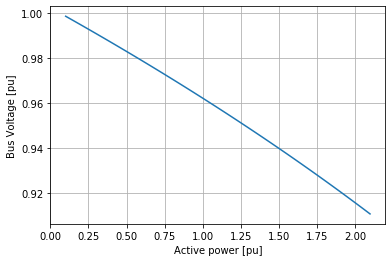

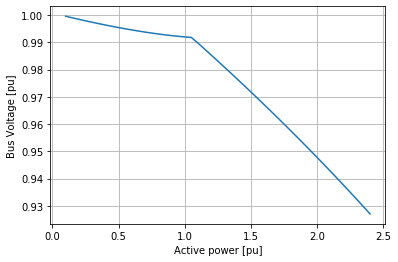

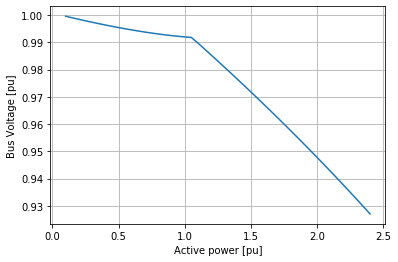

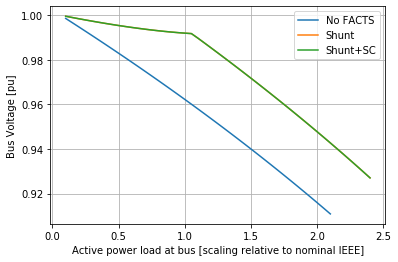

In [686]:
l_ind = 0
l_scaling = 1/l_scaling #Scale back to nominal before nose curves
l_p_mw = net_2b.load.p_mw[l_ind]
l_q_mvar = net_2b.load.q_mvar[l_ind]
net_2b.load.p_mw[l_ind] = l_p_mw*l_scaling
net_2b.load.q_mvar[l_ind] = l_q_mvar*l_scaling
l_load_limit = 100

NoseCurve1 = NoseCurve(1, net_2b, shunt=False, sc=False, line_load_limit=l_load_limit)
print(NoseCurve1[2][len(NoseCurve1[2])-1])
NoseCurve2 = NoseCurve(1, net_2b, shunt=True, sc=False, line_load_limit=l_load_limit)
print(NoseCurve2[2][len(NoseCurve2[2])-1])
NoseCurve3 = NoseCurve(1, net_2b, shunt=True, sc=True, line_load_limit=l_load_limit)
print(NoseCurve3[2][len(NoseCurve3[2])-1])
figMerge1 = MergeFig(NoseCurve1[1], NoseCurve1[2], 'No FACTS', 
                     NoseCurve2[1], NoseCurve2[2], 'Shunt',
                     NoseCurve3[1], NoseCurve3[2], 'Shunt+SC')